In [1]:
import cv2
import numpy as np
import os

In [2]:
def collect_dataset():
    images = []
    labels = []
    labels_dic = {}
   
    people = [person for person in os.listdir("/home/piyush/data/")]
   
    for i, person in enumerate(people):
        labels_dic[i] = person
        for image in os.listdir("/home/piyush/data/" + person)[:1000]:
            if image.endswith('.png'):
                images.append(cv2.imread("/home/piyush/data/" + person + '/' + image, 0))
                labels.append(i)
    return (images, np.array(labels), labels_dic)

In [3]:
images, labels, labels_dic = collect_dataset()

In [4]:
train_data = np.asarray(images)
train_data.shape

(2000, 64, 64)

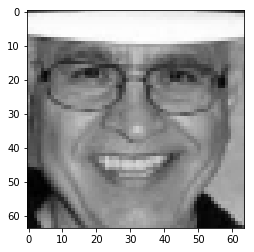

In [6]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0],cmap='gray')
plt.show()

In [7]:
len(labels)
labels_dic

{0: 'male', 1: 'female'}

In [9]:
train_data = train_data.reshape(len(train_data),-1)

In [11]:
train_data.shape

(2000, 4096)

In [12]:
np.unique(labels)

array([0, 1])

In [13]:
np.bincount(labels)

array([1000, 1000])

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [15]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(train_data.astype(np.float64))

In [16]:
pca1 = PCA(n_components=.97)
new_train=pca1.fit_transform(X_train_sc)

In [17]:
new_train.shape

(2000, 275)

In [18]:
pca1.n_components_

275

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV,KFold

In [20]:
param = {'C':[.0001,.001,.01,.1,1,10],'penalty':['l1','l2']}

In [21]:
gd = GridSearchCV(LogisticRegression(),param_grid=param,cv=10,scoring='accuracy')

In [22]:
gd.fit(new_train,labels)

/home/piyush/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/piyush/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/piyush/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/piyush/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/piyush/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

/home/piyush/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/piyush/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/piyush/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/piyush/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/piyush/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

/home/piyush/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/piyush/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/piyush/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/piyush/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/piyush/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

/home/piyush/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/piyush/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/piyush/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [23]:
gd.best_score_

0.7845

In [24]:
gd.best_params_

{'C': 0.1, 'penalty': 'l1'}

In [25]:
param = {'C':[.0001,.001,.01,.1,1,10]}

In [28]:
gd = GridSearchCV(LogisticRegression(penalty='l2',solver='sag',max_iter=1000),param_grid=param,cv=10,scoring='accuracy')

In [29]:
gd.fit(new_train,labels)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [30]:
gd.best_score_

0.7795

In [31]:
gd.best_params_

{'C': 0.001}

In [32]:
from sklearn.neural_network import MLPClassifier

In [71]:
mlp = MLPClassifier(hidden_layer_sizes=(500,500,500),max_iter=500,alpha=1e-4,learning_rate_init=0.01,
                    solver='sgd',random_state=1)

In [34]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test = train_test_split(train_data,labels,test_size=.2,random_state=10,shuffle=True)

In [38]:
X_train.shape

(1600, 4096)

In [40]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train.astype(np.float64))
X_test_sc = sc.transform(X_test.astype(np.float64))

In [41]:
pca1 = PCA(n_components=.97)
X_train_pca = pca1.fit_transform(X_train_sc)
X_test_pca = pca1.transform(X_test_sc)

In [42]:
X_train_pca.shape

(1600, 262)

In [72]:
mlp.fit(X_train_pca,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(500, 500, 500), learning_rate='constant',
       learning_rate_init=0.01, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [73]:
pred = mlp.predict(X_test_pca)

In [74]:
from sklearn.metrics import accuracy_score

In [75]:
accuracy_score(y_test,pred)

0.795